# Rothamsted Spinup
This notebook runs the whole spinup for the Rothamsted site, including:
1. Pre-BG spinup
2. BG spinup
3. Full spinup

## 0. Setup
The following cells are useful to run, also before other stages of the spinup

In [186]:
clear all;
% Add T&C Code directory to path so we don't need to navigate between folders from *within* the scripts
addpath("T&C_CODE");

% Make sure this is the root folder of this project
root_dir = cd;
% Descriptor will be saved with all other variables and can be helpful to reconstruct what has been done
descriptor = "Set SOM content to 4.75%";
% Some more information to compose the name of this experiment
short_descriptor = 'porg00475';
timestamp = datestr(now, "yy-mm-dd-HHMM");
id_location = 'Rothamsted';
run_identifier = [timestamp '_' id_location '_' short_descriptor];

% Location of parameters to be used in multiple stages of the spinup
param_filename = ['MOD_PARAM_' id_location '_Spinup_common'];
PARAM_IC = [root_dir filesep 'PARAMETER_PLOT_FILES' filesep param_filename];

## 1. Pre-BG Spinup

As a first step we run the spinup without the biogeochemistry module activated. For this we will use a truncated version of the prova-file, which does not specify the paths of the parameter and output files. We will do so ourselves and then call the main routine `MAIN_FRAME` directly from this notebook.

In [187]:
% Run truncated prova file to perform standard initialization
run("PARAMETER_PLOT_FILES\prova_Rothamsted_Spinup");

%%%%%%%%%%%%%%%%%%%%%%%%%%%%
MAIN_FRAME ;
%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% cd(current_directory);
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
initial_spinup_results_folder = ['results' filesep 'initial_spinup'];
mkdir(initial_spinup_results_folder);
initial_spinup_result_fn = [run_identifier '.mat'];
initial_spinup_results_path = [initial_spinup_results_folder filesep initial_spinup_result_fn];
save(initial_spinup_results_path);

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.

Iter:
     2

Iter:
        1000

Iter:
        2000

Iter:
        3000

Iter:
        4000

Iter:
        5000

Iter:
        6000

Iter:
        7000

Iter:
        8000

Iter:
        9000

Iter:
       10000

Iter:
       11000

Iter:
       12000

Iter:
       13000

Iter:
       14000

Iter:
       15000

Iter:
       16000

Iter:
       17000

Iter:
       18000

Iter:
       19000

Iter:
       20000

Iter:
       21000

Iter:
       22000

Iter:
       23000

Iter:
       24000

Iter:
       25000

Iter:
       26000

Iter:
       27000

Iter:
       28000

Iter:
       29000

Iter:
       30000

Iter:
       31000

Iter:
       32000

Iter:
       33000

Iter:
       34000

Iter:
       35000

Iter:
       36000

Iter:
       37000

Iter:
       38000

Iter:
       39000

Iter:
       40000

Iter:
       41000

Iter:
       42000

Iter:
       43000

Iter:
       44000

Iter:
       45000

Iter:
       46000

Iter:
       47000

Iter:
       48000

Iter:
       49000

Iter:


### 1.1 Calibration

Here, we can compare some of the model outputs, such as yield with recorded field values to get an idea if it matches. If not, the spinup should be repeated with modified parameters.
We will start by calculating the total simulated straw and grain yields per year.

In [ ]:
% Run this cell to load data from a previous spinup
initial_spinup_results_path = ['results' filesep 'initial_spinup' filesep '25-04-23-1817_Rothamsted_npk_res_ini_35_05_15.mat'];
load(initial_spinup_results_path);

In [188]:
% Setting this true means that negative `RB` values at planting will not be counted to yield
OPT_only_positive_yield = true;

[grain_yearly_pred, straw_yearly_pred] = estimate_yield(Datam, RB_L, OPT_only_positive_yield);

To compare with the reported yields from the field, we need to make sure that the units match (gC/m^2 vs. t/ha, where t is tons of 85% dry matter, and C content of dry matter is about 45% for grain and straw).

In [189]:
years_daily = Datam(1:24:end,1); %! Year for each day of the simulation (Datam is in h, hence only every 24th)
years = unique(years_daily);
years = years(2:end); % Ignore first year, which has no harvest
grain_yearly_obs = zeros(length(years), 1);
straw_yearly_obs = zeros(length(years), 1);
obs_dry_matter = 0.8;
c_content_grain = 0.45;
c_content_straw = 0.45;
grain_conversion_factor = obs_dry_matter * c_content_grain * 1e2;  %! from t/ha to gC/m^2
straw_conversion_factor = obs_dry_matter * c_content_straw * 1e2;  %! from t/ha to gC/m^2
for i=1:length(years)
    yr = years(i);
    grain_yearly_obs(i) = crop_data.grain(crop_data.harvest_year==yr) * grain_conversion_factor;
    straw_yearly_obs(i) = crop_data.straw(crop_data.harvest_year==yr) * straw_conversion_factor;
end

In [190]:
disp(['Mean grain yields - observed: ' num2str(mean(grain_yearly_obs)) ' , predicted: ' num2str(mean(grain_yearly_pred))])
disp(['Mean straw yields - observed: ' num2str(mean(straw_yearly_obs)) ' , predicted: ' num2str(mean(straw_yearly_pred))])

Mean grain yields - observed: 282.84 , predicted: 270.165
Mean straw yields - observed: 213.615 , predicted: 168.7045


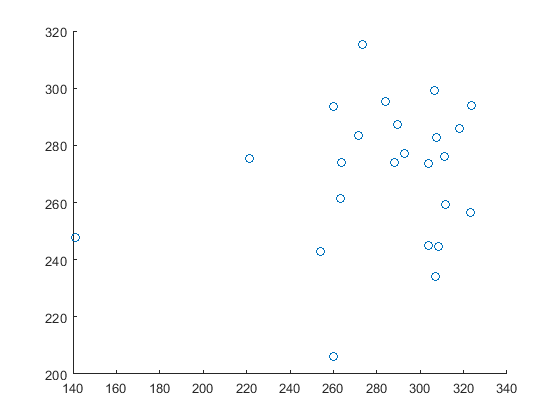

In [191]:
figure
scatter(grain_yearly_obs, grain_yearly_pred)

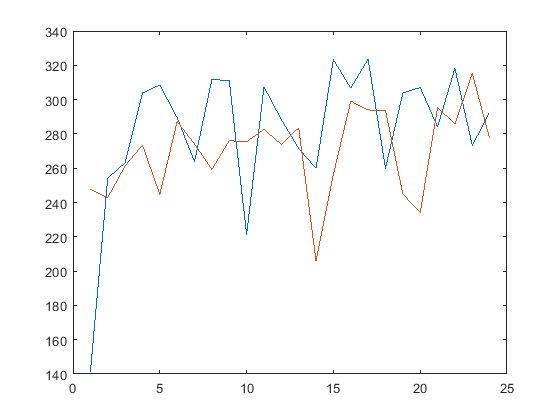

In [192]:
figure
plot(grain_yearly_obs)
hold on
plot(grain_yearly_pred)

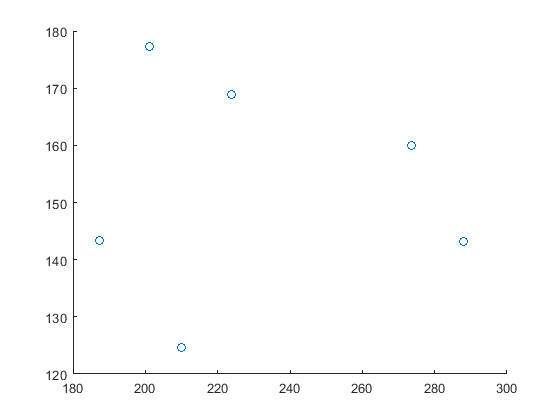

In [110]:
figure
scatter(straw_yearly_obs, straw_yearly_pred)
hold on
scatter(straw_yearly_obs(10:end), straw_yearly_pred(10:end))

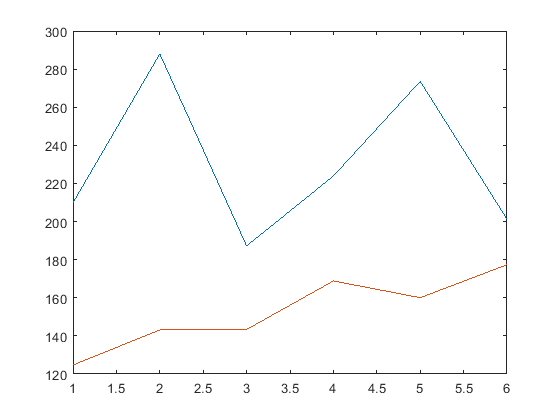

In [111]:
figure
plot(straw_yearly_obs)
hold on
plot(straw_yearly_pred)

### 1.2 Soil density

Just out of curiosity we can also compare soil densities. The Rothamsted data mentions 2.52*1e6 kg/ha dry soil weight for the first 23cm of soil. This corresponds to 2.52\*1e2 kg/m^2 * 1/(0.23 m) = 1.095 kg/m^3. T&C gives us a value that is only a few % off:

In [194]:
rsd


rsd = 1×9 double
1.0e+03 *

    1.2249    1.2249    1.2249    1.2249    1.2249    1.2249    1.2249    1.2249    1.2249

In [196]:
disp(sprintf('Estimated soil density: %.3e kg/m^3', mean(rsd)))


Estimated soil density: 1.225e+03 kg/m^3


## 2. Biogeochemistry Spinup

Now we will run the biogeochemistry spinup in isolation from the rest, for bouts of 100 years at once, and repeat that until the values for the BG pools remain relatively constant.

### 2.1. If simulations include woody vegetation
If your vegetation includes wook, you will have to derive the wood turnover coefficient (`Wm_H` and/or `Wm_L`) after the first spinup. You should then run a second spinup with the parameter file containing the correct values for this coefficient. See Simone Fatichi's tutorial video for details.

### 2.2. Run biogeochemistry spinup

The biogeochemistry spinup will run in multiple epochs. At each epoch the spinup continues from the previous state for a given number of years (`Nyears_epoch`). The spinup ends, if at the end of an epoch the value of none of the biogeochemistry pools has changed more than a given percentage (`rtol`), or if the maximum number of epochs (`N_epochs_max`) is reached.

Below, we define the parameters mentioned above, as well as the name of the initial spinup run, the strip for which to load the fertilizer data, as well as paths to the files holding manure data and deposition data.

In [11]:
%! Which strip should be simulated
relevant_strip = 11;
treatment_descriptor = 'N2P';

%! Identifier of initial spinup
initial_spinup_id = '25-05-09-1508_Rothamsted_porg00475';

%! Set the duration of the simulations
Nyears_epoch = 100;
N_epochs_max = 30;

%! If none of the pools changes more than 10% or 1e-4 during an epoch, the spinup ends
rtol = 0.1;
atol = 1e-4;

path_deposition_data = ['data' 'Inputs' 'All_deposition_data.mat'];
manure_data_path = [root_dir filesep 'data' filesep 'Rothamsted_manure_data.csv'];
initial_spinup_results_path = ['results' filesep 'initial_spinup' filesep initial_spinup_id];

OPT_Use_Fertilizer = true;  % Set `false` if fertilizer should not be applied
OPT_Plot = false;  % Set `true` to plot results of final epoch

%! Make sure all required functions are on the path
addpath("spinup_functions");
addpath("T&C_CODE");
addpath("utility_functions");

%! This will run the full spinup
bg_main(initial_spinup_results_path, initial_spinup_id, relevant_strip, treatment_descriptor, path_deposition_data, ...
    manure_data_path, Nyears_epoch, N_epochs_max, rtol, atol, OPT_Use_Fertilizer, OPT_Plot);

Including fertilizer in BG-spinup


Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.

Spin-up epoch 1: 12 of 55 elements in steady state.
Spin-up epoch 2: 50 of 55 elements in steady state.
Spin-up epoch 3: 53 of 55 elements in steady state.
Spin-up epoch 4: 52 of 55 elements in steady state.
Spin-up epoch 5: 52 of 55 elements in steady state.
Spin-up epoch 6: 52 of 55 elements in steady state.
Spin-up epoch 7: 52 of 55 elements in steady state.
Spin-up epoch 8: 52 of 55 elements in steady state.
Spin-up epoch 9: 52 of 55 elements in steady state.
Spin-up epoch 10: 54 of 55 elements in steady state.
Spin-up epoch 11: 54 of 55 elements in steady state.
Spin-up epoch 12: 54 of 55 elements in steady state.
Spin-up epoch 13: 54 of 55 elements in steady state.
Spin-up epoch 14: 54 of 55 elements in steady state.
Spin-up epoch 15: 54 of 55 elements in steady state.
Spin-up epoch 16: 55 of 55 elements in steady state.
Spin-up complete


## 3 Copuled model spin-up

### 3.1 Repeat until pools converge

This will run the spinup for as many epochs as required such that between two repetitions the values for variables defined in `compare_vars` are within the tolerance defined by `atol` and `rtol` for *each timestep*.

To pick up from a previous run, you will have to update the `prev_data_path`. You can set `prev_bg_path` to "none", to get the biogeochemistry data from the same file.

In [ ]:
clearvars

% Strip (=treatment) selection
relevant_strip = 11;
treatment_descriptor = 'N2P';
descriptor_full = "Full spinup providing no NPK reserve. Fertilizer as in Rothamsted Strip 11 with N and P already applied at BG spinup";

% Determine stopping conditions
N_max_epochs = 20;
atol = 1e-4;
rtol = 0.05;
compare_vars = ["NPP_L", "RB_L", "P"];

% Data to build run ID
id_location = 'Rothamsted';
timestamp = '25-05-09-1508';
short_descriptor = 'porg00475';
short_descriptor_full = 'npk_res_ini_0_0_0_fert_like_field';

% Construct paths
root_dir = cd;
run_identifier = [timestamp '_' id_location '_' short_descriptor];
prev_data_path = ['results' filesep 'initial_spinup' filesep run_identifier];

treatment_id = [sprintf('%d', relevant_strip) '_' treatment_descriptor];
run_identifier_bg = [run_identifier '_' treatment_id];
prev_bg_path = ['results' filesep 'bg_spinup' filesep run_identifier_bg filesep 'final.mat'];

prova_file_path = ['PARAMETER_PLOT_FILES' filesep 'prova_' id_location '_Spinup'];

run_id_full = [run_identifier_bg '_' short_descriptor_full];
output_dir = [root_dir filesep 'results' filesep 'full_spinup' filesep run_id_full];

% Location of parameters to be used in multiple stages of the spinup
param_filename = ['MOD_PARAM_' id_location '_Spinup_common'];
initial_parameters_path = [root_dir filesep 'PARAMETER_PLOT_FILES' filesep param_filename];
bg_parameters_path = [root_dir filesep 'PARAMETER_PLOT_FILES' filesep 'MOD_PARAM_' id_location '_bg'];

% Add necessary paths
addpath("T&C_CODE");
addpath("spinup_functions");
addpath("utility_functions");

% Run the actual spinup
[final_path, reached_equilibrium] = coupled_model_main(relevant_strip, descriptor_full, ...
    root_dir, output_dir, N_max_epochs, rtol, atol, compare_vars, ...
    prev_data_path, prev_bg_path, prova_file_path, initial_parameters_path, bg_parameters_path)

### 3.2 Some preliminary tests on the data

We will now load the data from `final_path`. If it is not in the workspace anymore, or to load some other data, it can be redifined below:

In [1]:
final_path = "results\full_spinup\25-05-09-1508_Rothamsted_porg00475_3_nil_npk_res_ini_0_0_0_fert_like_field_rep13.mat";
load(final_path);

#### 3.2.1 Nutrient pool evolution

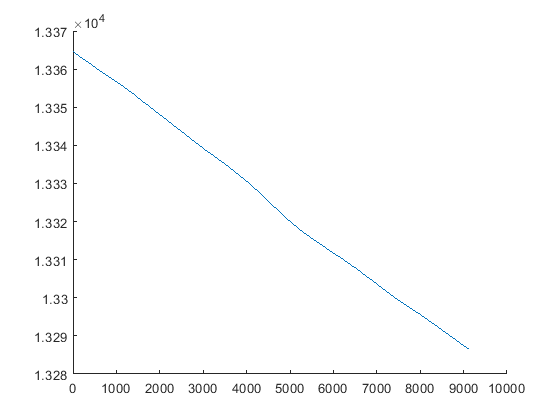

In [2]:
% Plot nutrient pools to see if they are stable
figure; hold on
plot(P(:,[45]))

#### 3.2.2 Soil organic carbon and soil N

In [3]:
%! Soil N in gN / g dry soil
soil_C_content = sum(P(end, 6:21)) / (Zbio * sum(rsd .* Bio_Zs))
%! Soil N in gN / g dry soil
soil_N_content = sum(P(end, 25:33)) / (Zbio * sum(rsd .* Bio_Zs))

soil_C_content = 0.0057

soil_N_content = 0.0010

#### 3.2.3 Yield

In [4]:
addpath("utility_functions")

In [5]:
% Setting this true means that negative `RB` values at planting will not be counted to yield
OPT_only_positive_yield = true;

[grain_yearly_pred, straw_yearly_pred] = estimate_yield(Datam, RB_L, OPT_only_positive_yield);


Unable to resolve the name 'prev_data.Datam'.

In [6]:
years_daily = Datam(2:24:end,1); %! Year for each day of the simulation (Datam is in h, hence only every 24th)
years = unique(years_daily);
years = years(2:end); % Ignore first year, which has no harvest
grain_yearly_obs = zeros(length(years), 1);
straw_yearly_obs = zeros(length(years), 1);
obs_dry_matter = 0.8;
c_content_grain = 0.45;
c_content_straw = 0.45;
grain_conversion_factor = obs_dry_matter * c_content_grain * 1e2;  %! from t/ha to gC/m^2
straw_conversion_factor = obs_dry_matter * c_content_straw * 1e2;  %! from t/ha to gC/m^2
for i=1:length(years)
    yr = years(i);
    grain_yearly_obs(i) = crop_data.grain(crop_data.harvest_year==yr) * grain_conversion_factor;
    straw_yearly_obs(i) = crop_data.straw(crop_data.harvest_year==yr) * straw_conversion_factor;
end

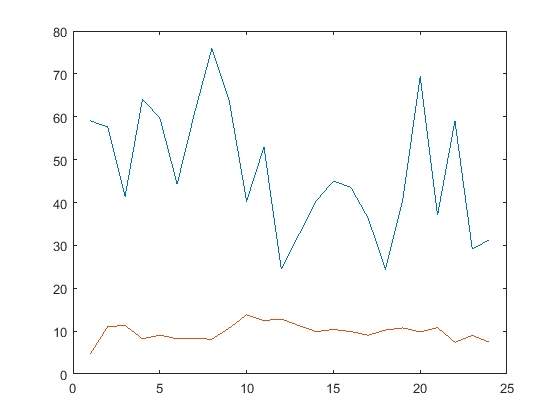

In [8]:
figure
plot(grain_yearly_obs)
hold on
plot(grain_yearly_pred)